In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from matplotlib import rcParams
from matplotlib.pyplot import matshow

## Loading the data and preparing the DataFrame from the csv file ##

In [75]:
df = pd.read_csv("framingham.csv")

In [79]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [80]:
#dropping irrelevant columns
df.drop(['education'], axis = 1, inplace = True) 

In [82]:
df.shape

(4240, 15)

In [83]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [84]:
#checking for null values

df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<b><i> A total of 4240 data with 15 columns, 644 observations to be risked to heart disease, and 388 data are missing or invalid.</i> </b>

## Data Cleaning ##

<b> Dropping the missing data </b>

0    3179
1     572
Name: TenYearCHD, dtype: int64


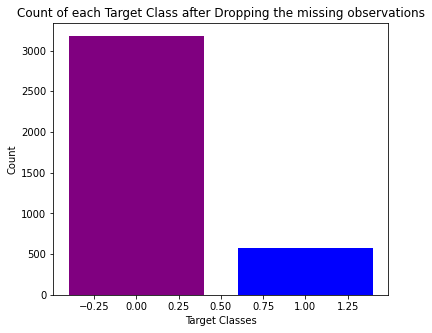

In [88]:
#dropping missing rows and checking count of target class

df_test=df
df_test.dropna(axis=0,inplace=True)
# df_test.shape

plt.bar(df_test.TenYearCHD.unique(), df_test.TenYearCHD.value_counts(), color = ['purple', 'blue'])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class after Dropping the missing observations')
print(df_test.TenYearCHD.value_counts())

<i>Dropping so many observations in this case might cause irrelevance in the training the model. So we <b>impute</b> the data.</i>

## Imputing the missing values##

In [108]:
df = pd.read_csv("framingham.csv")
df.drop("education",axis=1,inplace=True)

In [109]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [110]:
#Imputing missing values in cigsPerDay column with mean

df["cigsPerDay"]

print(df["cigsPerDay"].mean())

#Avg. cigsPerDay is 9 so, we will fill missing values in cigsPerDay with value 9

9.005936832106388


In [111]:
df["cigsPerDay"].fillna(9,inplace=True)

In [115]:
#BpMeds is categorical column which says whether patient takes any BP medicine 1 refers to yes 0 refers to no
#We will fill missing values in this column using mode

In [116]:
df["BPMeds"].mode()

0    0.0
dtype: float64

In [117]:
#The mode value in BPMeds is 0

df["BPMeds"].fillna(0,inplace=True)

In [118]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [127]:
#totChol is a continuos column
df["totChol"]

0       195.0
1       250.0
2       245.0
3       225.0
4       285.0
        ...  
4235    248.0
4236    210.0
4237    269.0
4238    185.0
4239    196.0
Name: totChol, Length: 4240, dtype: float64

In [18]:
pipe1=Pipeline([("imputer",SimpleImputer(strategy="mean")),("scaler",StandardScaler())])
df1=pipe1.fit_transform(ddf)
df_mean=pd.DataFrame(data=df1[0:,0:],  columns=cols)

pipe2=Pipeline([("imputer",SimpleImputer(strategy="median")),("scaler",StandardScaler())])
df2=pipe1.fit_transform(ddf)
df_median=pd.DataFrame(data=df2[0:,0:],  columns=cols)

pipe3=Pipeline([("imputer",SimpleImputer(strategy="most_frequent")),("scaler",StandardScaler())])
df3=pipe1.fit_transform(ddf)
df_most=pd.DataFrame(data=df3[0:,0:],  columns=cols)


In [19]:
df_mean.shape

(4240, 14)

In [20]:
df_mean

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.153113,-1.234283,-0.988276,-0.758062,-1.758000e-01,-0.077014,-0.671241,-0.162437,-0.940825,-1.196267,-1.083027,0.287258,0.342775,-2.174271e-01
1,-0.867217,-0.417664,-0.988276,-0.758062,-1.758000e-01,-0.077014,-0.671241,-0.162437,0.300085,-0.515399,-0.159355,0.719668,1.590435,-2.612309e-01
2,1.153113,-0.184345,1.011863,0.925410,-1.758000e-01,-0.077014,-0.671241,-0.162437,0.187275,-0.220356,-0.243325,-0.113213,-0.073111,-5.240539e-01
3,-0.867217,1.332233,1.011863,1.767146,-1.758000e-01,-0.077014,1.489778,-0.162437,-0.263965,0.800946,1.016227,0.682815,-0.904884,9.214724e-01
4,-0.867217,-0.417664,1.011863,1.177931,-1.758000e-01,-0.077014,-0.671241,-0.162437,1.089756,-0.106878,0.092555,-0.663554,0.758662,1.330035e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-0.867217,-0.184345,1.011863,0.925410,2.059493e-17,-0.077014,-0.671241,-0.162437,0.254961,-0.061487,-0.915087,-0.933810,0.675484,1.768073e-01
4236,-0.867217,-0.650984,1.011863,0.504542,-1.758000e-01,-0.077014,-0.671241,-0.162437,-0.602395,-0.265747,0.344466,-1.631564,0.841839,-6.224898e-16
4237,-0.867217,0.282295,-0.988276,-0.758062,-1.758000e-01,-0.077014,-0.671241,-0.162437,0.728764,0.051991,0.008585,-1.064025,0.342775,1.096688e+00
4238,1.153113,-1.117623,-0.988276,-0.758062,-1.758000e-01,-0.077014,1.489778,-0.162437,-1.166445,0.392425,1.268138,-0.049334,-0.738530,-4.364462e-01


<b> This is the preprocessed data </b>

## Exploratory Analysis ##

## Histogram ##

In [21]:
from ipywidgets import widgets

feature_desc={'age':'Age of person',
              'cigsPerDay':'No of average ciggarete taken per day',
              'BPMeds':'BPMeds',
              'prevalentStroke':'prevalentStroke',
              'prevalentHype':'prevalentHype',
             'diabetes':'diabetes',
             'totChol':'Total Cholesterol Value Measured',
             'sysBP':'sysBP',
             'diaBP':'diaBP',
             'BMI':'Body Mass Index',
             'heartRate':'Heart Rate',
             'glucose':'Glucose',
             'TenYearCHD':'Ten Year CHD'}

def hist_feature(column):
    df[column].hist(bins=20,facecolor='midnightblue')
    plt.show()
   


dropdown_menu = {v:k for k,v in feature_desc.items()}

widgets.interact(hist_feature, column=dropdown_menu)

interactive(children=(Dropdown(description='column', options={'Age of person': 'age', 'No of average ciggarete…

<function __main__.hist_feature(column)>

## Correlation Matrix Visualization ##

ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of ticklabels (15).

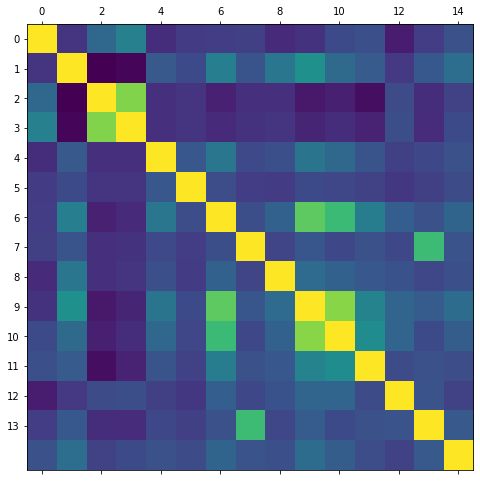

In [22]:
from matplotlib import rcParams
from matplotlib.pyplot import matshow

rcParams['figure.figsize'] = 3,8
plt.matshow(df.corr())
plt.yticks(np.arange(df_mean.shape[1]), df.columns)
plt.xticks(np.arange(df_mean.shape[1]), df.columns)
plt.colorbar()

In [ ]:
rcParams['figure.figsize'] = 8,6
plt.bar(df.TenYearCHD.unique(), df.TenYearCHD.value_counts(), color = ['purple', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [23]:
df_mean.describe()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03,4.240000e+03
mean,-2.149748e-16,1.479948e-16,6.593258e-16,-2.361842e-17,-8.456679e-16,-1.269922e-15,-1.964362e-16,1.969913e-15,-2.105234e-17,-6.134375e-17,2.998126e-17,-3.665831e-16,-3.602726e-16,-3.888694e-16
std,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00
min,-8.672175e-01,-2.050902e+00,-9.882763e-01,-7.580622e-01,-1.758000e-01,-7.701427e-02,-6.712410e-01,-1.624373e-01,-2.926282e+00,-2.217569e+00,-2.930371e+00,-2.520953e+00,-2.651607e+00,-1.838169e+00
25%,-8.672175e-01,-8.843035e-01,-9.882763e-01,-7.580622e-01,-1.758000e-01,-7.701427e-02,-6.712410e-01,-1.624373e-01,-6.926429e-01,-6.969637e-01,-6.631763e-01,-6.690817e-01,-6.553523e-01,-4.364462e-01
50%,-8.672175e-01,-6.768471e-02,-9.882763e-01,-7.580622e-01,-1.758000e-01,-7.701427e-02,-6.712410e-01,-1.624373e-01,-6.090666e-02,-1.976605e-01,-7.538502e-02,-9.601497e-02,-7.311125e-02,-8.601561e-02
75%,1.153113e+00,7.489341e-01,1.011863e+00,9.254100e-01,-1.758000e-01,-7.701427e-02,1.489778e+00,-1.624373e-01,5.708296e-01,5.285987e-01,5.963764e-01,5.483012e-01,5.923071e-01,1.330035e-01
max,1.153113e+00,2.382172e+00,1.011863e+00,5.134090e+00,5.760286e+00,1.298461e+01,1.489778e+00,6.156223e+00,1.036274e+01,7.382670e+00,5.004811e+00,7.616124e+00,5.582945e+00,1.366839e+01


### Conclusion of Exploratory Analysis
Out of 3715 observations over 500 observation (Patient) are at the risk of heart disease.

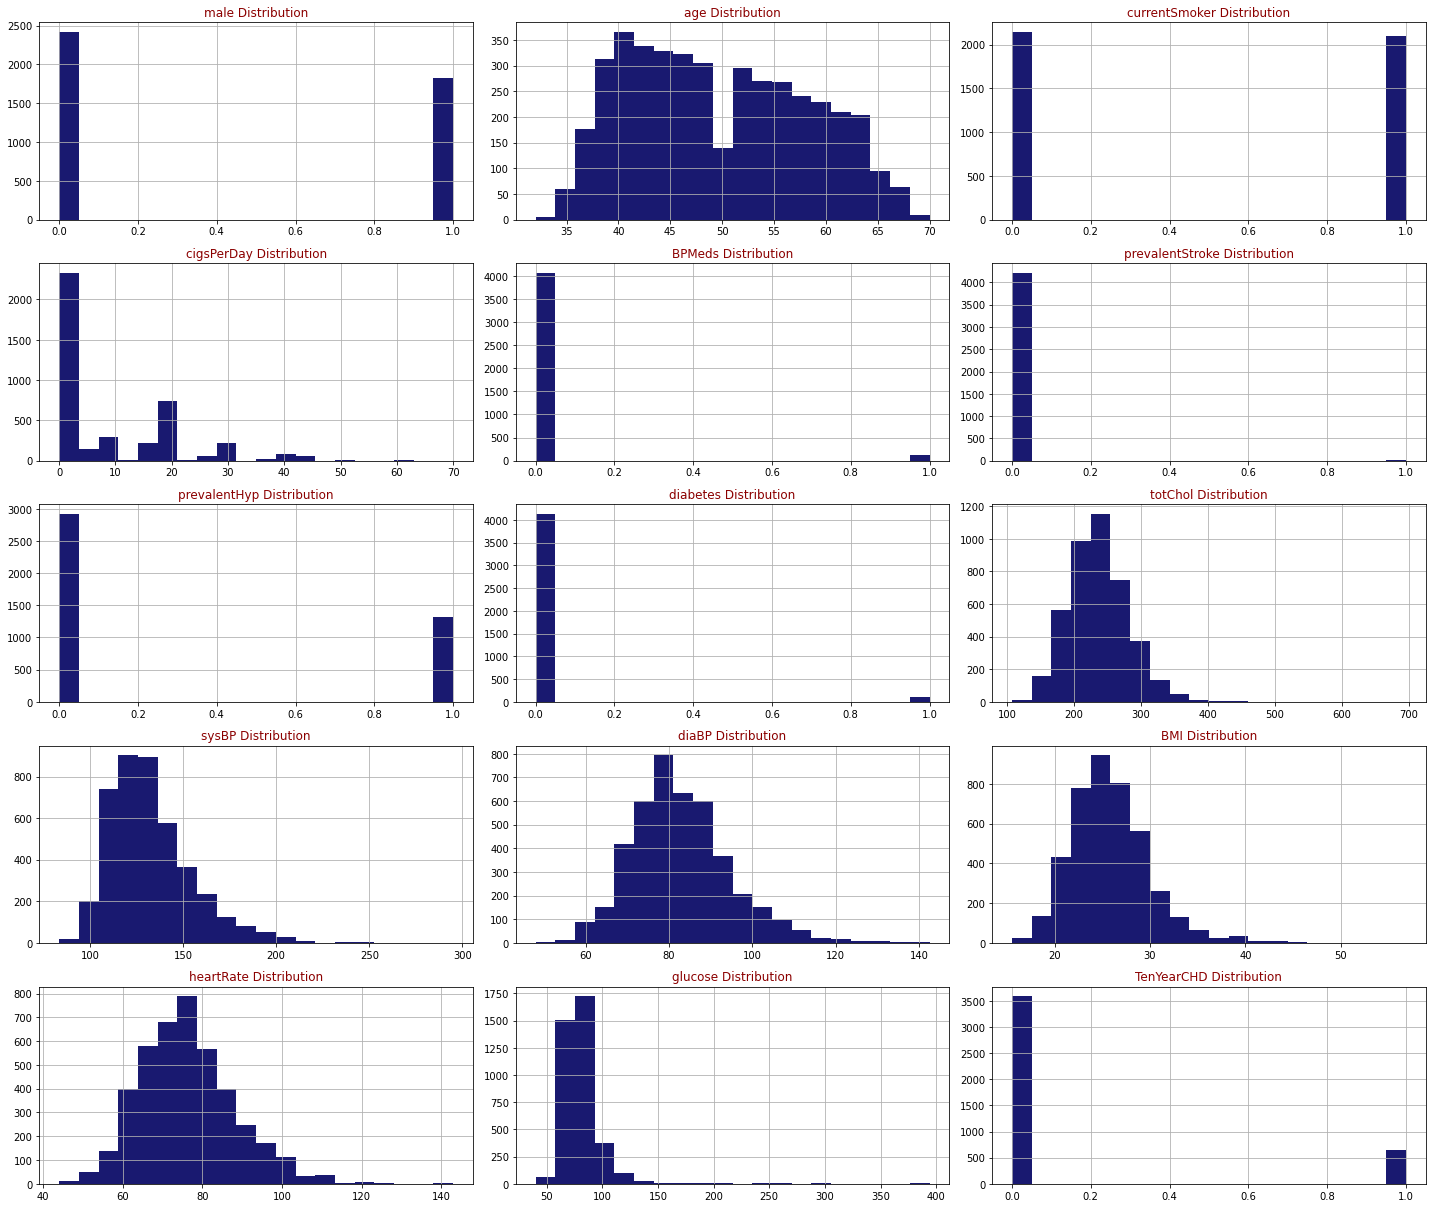

In [24]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

## Logistic Regression ##

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from statsmodels.tools import add_constant


In [26]:
df_constant = add_constant(df)
df_constant.head()

,const,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0



## Why adding a constant column?
It’s because you expect your dependent variable to take a nonzero value when all the otherwise included regressors are set to zero.

Suppose you want to model the wage as a function of years of secondary schooling (in years). You’d estimate an equation of the form

yi=α+xiβ+εi

because one can reasonably expect the wage to take, on average, a positive value even if one’s secondary schooling is null. This value would show up as a constant.

Note however that a constant may take an absurd value while being relevant for the estimation, or may be irrelevant altogether. Suppose further you’re interested in estimating the model above with variables as deviations from their mean.

yi−y¯=(α−α¯)+(xi−x¯)β~+νi

Obviously, the constant equals its average value so that the first term on the right-hand side cancels out. You end up with

yi−y¯=(xi−x¯)β~+νi

that is a model without constant. In practice, including one would probably not be of any concern (for a reasonable amount of observations), but would be theoretically injustified.

Remember that you should always know whether what you estimate makes sense, both from a real and statistical point of view!



## Feature Selection

## 1. Backward elimination (P-value approach)

In [27]:
X1_components=df_mean.columns
X1=df_mean[X1_components]
y1=df.TenYearCHD

X2_components=df_median.columns
X2=df_median[X2_components]
y2=df.TenYearCHD

In [28]:
X1.shape


(4240, 14)

In [29]:
column_list=['male','age','currentSmoker','cigsPerDay' ,'BPMeds','prevalentStroke','prevalentHyp' ,'diabetes',  'totChol', 'sysBP',  'diaBP', 'BMI','heartRate',  'glucose']

In [30]:
df_mean.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [31]:
def feature_selection(data_frame, dependent_variable, column_list):
    while len(column_list)>0:
        model = sm.Logit(dependent_variable, data_frame[column_list])
        result = model.fit(disp = 0)
        largest_pvalue = round(result.pvalues, 3).nlargest(1)
        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            column_list = column_list.drop(largest_pvalue.index)
            
cols = df_mean.columns[:-1]
result1 = feature_selection(df_mean, y1, cols)
print("This is the result using the imputation for mean values")
result1.summary()

This is the result using the imputation for mean values


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4234
Method:                           MLE   Df Model:                            5
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                 -0.5700
Time:                        14:13:02   Log-Likelihood:                -2835.5
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.1053      0.033      3.178      0.001       0.040       0.170
age                 0.2626      0.035      7.505      0.000       0.194       0.331
cigsPerDay          0.1294      0.034      3.812      0.000       0.063       0.196
prevalentStroke     0.0813      0.038      2.124      0.034       0.006       0.156
diabetes            0.1055      0.035      3.046      0.002       0.038       0.173
sysBP               0.2244      0.035      6.370      0.000       0.155       0.293
===================================================================================
"""

In [32]:
column_list=["male","age","cigsPerDay","prevalentStroke","diabetes","sysBP"]
new=df_mean[column_list]
new

,male,age,cigsPerDay,prevalentStroke,diabetes,sysBP
0,1.153113,-1.234283,-0.758062,-0.077014,-0.162437,-1.196267
1,-0.867217,-0.417664,-0.758062,-0.077014,-0.162437,-0.515399
2,1.153113,-0.184345,0.925410,-0.077014,-0.162437,-0.220356
3,-0.867217,1.332233,1.767146,-0.077014,-0.162437,0.800946
4,-0.867217,-0.417664,1.177931,-0.077014,-0.162437,-0.106878
...,...,...,...,...,...,...
4235,-0.867217,-0.184345,0.925410,-0.077014,-0.162437,-0.061487
4236,-0.867217,-0.650984,0.504542,-0.077014,-0.162437,-0.265747
4237,-0.867217,0.282295,-0.758062,-0.077014,-0.162437,0.051991
4238,1.153113,-1.117623,-0.758062,-0.077014,-0.162437,0.392425


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (15).

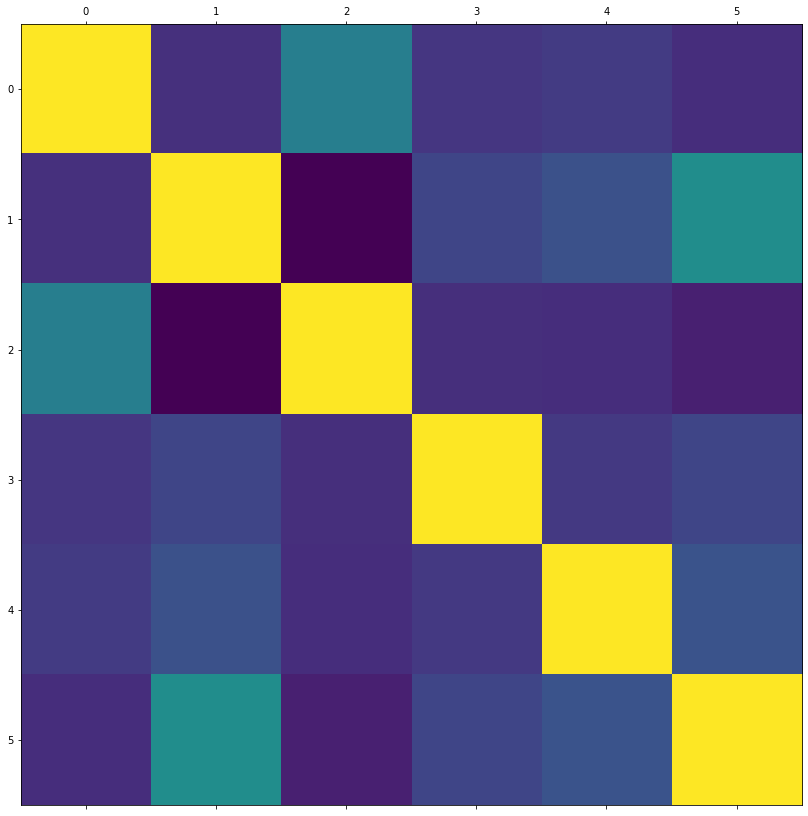

In [33]:
from matplotlib import rcParams
from matplotlib.pyplot import matshow

column_list=["male","age","cigsPerDay","prevalentStroke","diabetes","sysBP"]
new=df_mean[column_list]

rcParams['figure.figsize'] = 20, 14
plt.matshow(new.corr())
plt.yticks(np.arange(new.shape[1]), df.columns)
plt.xticks(np.arange(new.shape[1]), df.columns)
plt.colorbar()

In [34]:

result2 = feature_selection(df_median, y2, cols)
print("This is the result using the imputation for median values")
result2.summary()

This is the result using the imputation for median values


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4234
Method:                           MLE   Df Model:                            5
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                 -0.5700
Time:                        14:13:03   Log-Likelihood:                -2835.5
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.1053      0.033      3.178      0.001       0.040       0.170
age                 0.2626      0.035      7.505      0.000       0.194       0.331
cigsPerDay          0.1294      0.034      3.812      0.000       0.063       0.196
prevalentStroke     0.0813      0.038      2.124      0.034       0.006       0.156
diabetes            0.1055      0.035      3.046      0.002       0.038       0.173
sysBP               0.2244      0.035      6.370      0.000       0.155       0.293
===================================================================================
"""

## Without KFold

In [35]:
column_list=["male","age","cigsPerDay","prevalentStroke","diabetes","sysBP"]
X=df_mean[column_list]
y=df.TenYearCHD

X_train,X_test,y_train,y_test=train_test_split(*shuffle(X,y), test_size=0.2, random_state=5)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [36]:
log_model.score(X_train,y_train)

0.8567216981132075

In [37]:
log_model.score(X_test,y_test)


0.8349056603773585

In [38]:
results=confusion_matrix(y,log_model.predict(X))
results

array([[3568,   28],
       [ 598,   46]], dtype=int64)

In [60]:
results

array([[3568,   28],
       [ 598,   46]], dtype=int64)

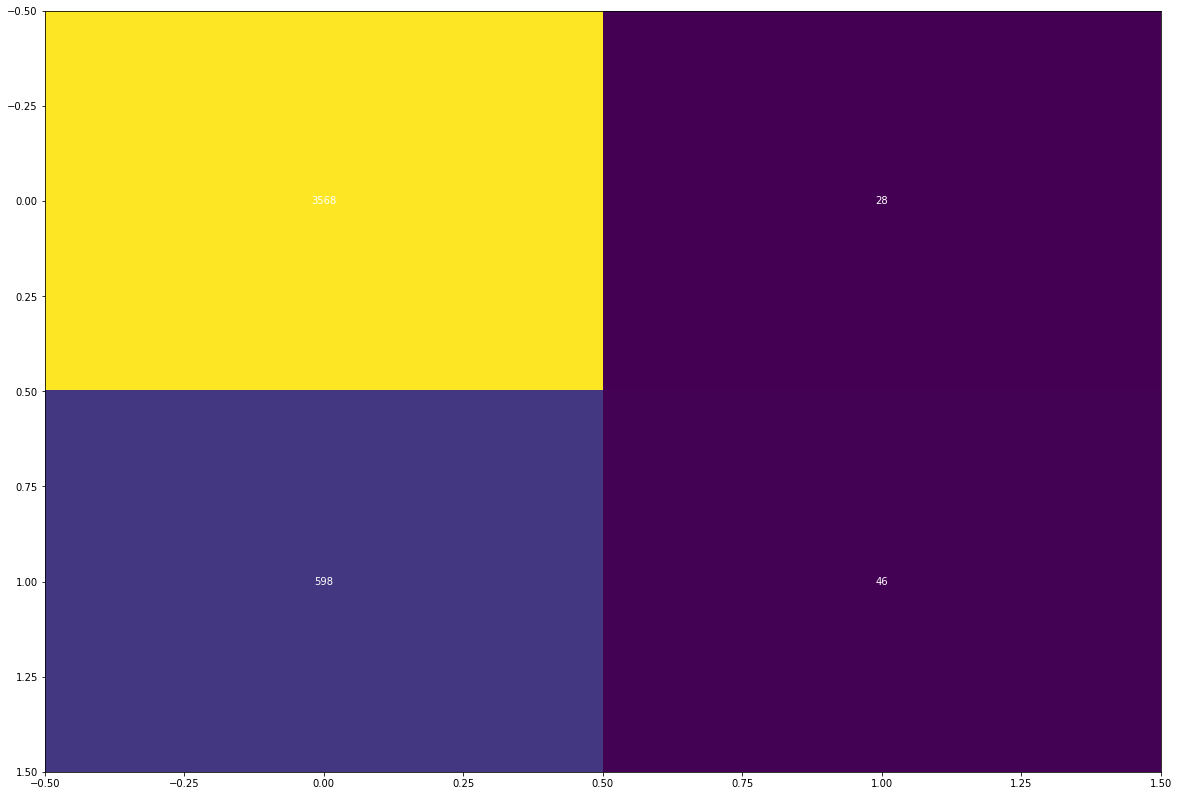

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# y_true is the true labels
# y_pred is the predicted labels
classes = ['TP', 'FP', 'TN', 'FN']


# display confusion matrix with numbers on the plot
plt.imshow(results, interpolation='None', aspect='auto')
plt.grid(False)
for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        plt.text(j, i, results[i, j], ha="center", va="center", color="white")
plt.savefig("D:/data/confusion_matrix.jpg")
plt.show()



In [39]:
classification_report(y_train, log_model.predict(X_train))

'              precision    recall  f1-score   support\n\n           0       0.86      0.99      0.92      2887\n           1       0.65      0.08      0.15       505\n\n    accuracy                           0.86      3392\n   macro avg       0.75      0.54      0.53      3392\nweighted avg       0.83      0.86      0.81      3392\n'

In [40]:
classification_report(y_test, log_model.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.84      0.99      0.91       709\n           1       0.44      0.03      0.05       139\n\n    accuracy                           0.83       848\n   macro avg       0.64      0.51      0.48       848\nweighted avg       0.77      0.83      0.77       848\n'

## 2. Recursive Feature Elimination with Cross Validation 

In [41]:
df_mean.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [42]:
rfc = RandomForestClassifier()
rfecv = RFECV(estimator = rfc, step = 1, cv = StratifiedKFold(10), scoring = 'r2',verbose=1)
X_components=df_mean.columns
X=df_mean[X_components]
y=df.TenYearCHD
print(X.shape)
print(y.shape)

rfecv.fit(X, y)

(4240, 14)
(4240,)
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 14 features.
Fitting estimator with 13

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='r2', verbose=1)

In [44]:
X_components=df_mean.columns
X=df[X_components]
X

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [45]:
X.columns


Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [46]:
# X_components=df_mean.columns
# X=df[X_components]
# dset = df
# print(dset.shape)
# print(X)
# dset['attr'] = X.columns
# dset['importance'] = rfecv.estimator_.feature_importances_

# dset = dset.sort_values(by='importance', ascending=False)


# plt.figure(figsize=(16, 14))
# plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
# plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
# plt.xlabel('Importance', fontsize=14, labelpad=20)
# plt.show()

In [47]:
# rfecv_unscaled = RFECV(estimator = rfc, 
#                        step = 1, 
#                        cv = StratifiedKFold(10), 
#                        scoring = 'accuracy',verbose=1)
# X_components=df_pre.columns
# X_unscaled=df_pre[X_components]
# y_unscaled=df_pre.TenYearCHD


# rfecv_unscaled.fit(X_unscaled, y_unscaled)

In [48]:
X_components=df_mean.columns
X=df_mean[X_components]
rfecv_array = [True, True, False,True,False,False,True,False,True,True,True,True,True,True]
res = [i for i, val in enumerate(rfecv_array) if not val]
X.drop(X.columns[res], axis=1, inplace=True)

In [49]:
X_train,X_test,y_train,y_test=train_test_split(*shuffle(X,y), 
                                               test_size=0.2, 
                                               random_state=5)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [50]:
log_model.score(X_train,y_train)

0.8540683962264151

In [51]:
log_model.score(X_test,y_test)

0.8561320754716981

In [52]:
rfecv.estimator_.feature_importances_

array([0.02003879, 0.12303985, 0.0115656 , 0.05413318, 0.01879084,
       0.13260593, 0.14387836, 0.12427737, 0.13977602, 0.10071335,
       0.13118071])

In [53]:
X_components=df.columns[:-1]
X=df[X_components]
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

ValueError: Length of values does not match length of index

## 3. Coefficient values

In [54]:
X_components=df.columns[:-1]
X=df[X_components]
y=df.TenYearCHD

In [55]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state = 0)
logreg = LogisticRegression(fit_intercept = False)
logreg.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [56]:
np.round(logreg.coef_, decimals = 2) > 0
# logreg.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [57]:
# Calculating Accuracy of coefficient values

In [58]:
# print(np.where(rfecv.support_ == False)[0])
coefficient_array = [ True,  True, False,  True,  True,  True,  True,  True, False,True, False, False, False, False]
res = [i for i, val in enumerate(coefficient_array) if not val]
X.drop(X.columns[res], axis=1, inplace=True)
X

C:\Users\mail2\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,sysBP
0,1,39,0.0,0.0,0,0,0,106.0
1,0,46,0.0,0.0,0,0,0,121.0
2,1,48,20.0,0.0,0,0,0,127.5
3,0,61,30.0,0.0,0,1,0,150.0
4,0,46,23.0,0.0,0,0,0,130.0
...,...,...,...,...,...,...,...,...
4235,0,48,20.0,NaN,0,0,0,131.0
4236,0,44,15.0,0.0,0,0,0,126.5
4237,0,52,0.0,0.0,0,0,0,133.5
4238,1,40,0.0,0.0,0,1,0,141.0


In [39]:
X_train,X_test,y_train,y_test=train_test_split(*shuffle(X,y), test_size=0.2, random_state=5)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
log_model.score(X_train, y_train)

0.848

In [41]:
log_model.score(X_test, y_test)

0.8641810918774967

## 4. Recursive Feature Extraction

In [43]:
X_components=df.columns[:-1]
X=df[X_components]
y=df.TenYearCHD
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state = 0)

In [44]:
predictors = X_train
selector = RFE(logreg, n_features_to_select = 1)
selector = selector.fit(predictors, y_train)

c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://sc

In [45]:
order = selector.ranking_
order

array([ 1,  8,  7, 10,  5,  4,  2,  3, 14, 12, 11,  6,  9, 13])

In [46]:
feature_ranks = []
for i in order:
    feature_ranks.append(f"{i}.{df.columns[i]}")
feature_ranks

['1.age',
 '8.totChol',
 '7.diabetes',
 '10.diaBP',
 '5.prevalentStroke',
 '4.BPMeds',
 '2.currentSmoker',
 '3.cigsPerDay',
 '14.TenYearCHD',
 '12.heartRate',
 '11.BMI',
 '6.prevalentHyp',
 '9.sysBP',
 '13.glucose']

In [47]:
rfe_array = [True,True,True,True,True,True,True,True,False,False, False, True,True,False]
res = [i for i, val in enumerate(rfe_array) if not val]
X.drop(X.columns[res], axis=1, inplace=True)
X

c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,BMI,heartRate
0,1,39,0,0.0,0.0,0,0,0,26.97,80.0
1,0,46,0,0.0,0.0,0,0,0,28.73,95.0
2,1,48,1,20.0,0.0,0,0,0,25.34,75.0
3,0,61,1,30.0,0.0,0,1,0,28.58,65.0
4,0,46,1,23.0,0.0,0,0,0,23.10,85.0
...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,25.97,66.0
4234,1,51,1,43.0,0.0,0,0,0,19.71,65.0
4237,0,52,0,0.0,0.0,0,0,0,21.47,80.0
4238,1,40,0,0.0,0.0,0,1,0,25.60,67.0


In [48]:
X_train,X_test,y_train,y_test=train_test_split(*shuffle(X,y), test_size=0.2, random_state=5)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
log_model.score(X_train, y_train)

0.8473333333333334

In [50]:
log_model.score(X_test, y_test)

0.8348868175765646

## 5. Feature Extraction Using SFM

In [52]:
X_components=df.columns[:-1]
X=df[X_components]
y=df.TenYearCHD
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state = 0)
smf = SelectFromModel(logreg, threshold = -np.inf, max_features = 8)
smf.fit(X_train, y_train)

c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=False,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=8, norm_order=1, prefit=False, threshold=-inf)

In [53]:
feature_idx = smf.get_support()
feature_idx
# feature_name = df.columns[feature_idx]
# feature_name

array([ True,  True,  True, False,  True, False,  True,  True, False,
       False,  True,  True, False, False])

In [54]:
sfm_array =[ True,  True,  True, False,  True, False,  True,  True, False,False,  True,  True, False, False]
res = [i for i, val in enumerate(sfm_array) if not val]
X.drop(X.columns[res], axis=1, inplace=True)

c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
X_train,X_test,y_train,y_test=train_test_split(*shuffle(X,y), test_size=0.2, random_state=5)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
log_model.score(X_train, y_train)

0.8466666666666667

In [57]:
log_model.score(X_test, y_test)

0.833555259653795

## Naive Bayes ##

In [59]:
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

In [60]:
separate_by_class(df)

KeyError: 0

## Using K-fold for cross validation